**SALES PREDICTION USING PYTHON**

**importing the dependencies**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Data Gathering**

In [ ]:
data = pd.read_csv("/content/advertising.csv")
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
## Check the size
data.shape

(200, 4)

In [ ]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
## Check basic statistic
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
## Check basic statistic
data.describe(include = "all")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Data Cleaning**

In [ ]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates

0

In [ ]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data["Sales"].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

In [ ]:
data.shape

(200, 4)

**Data Visualization**

**Pairplot for all variables**

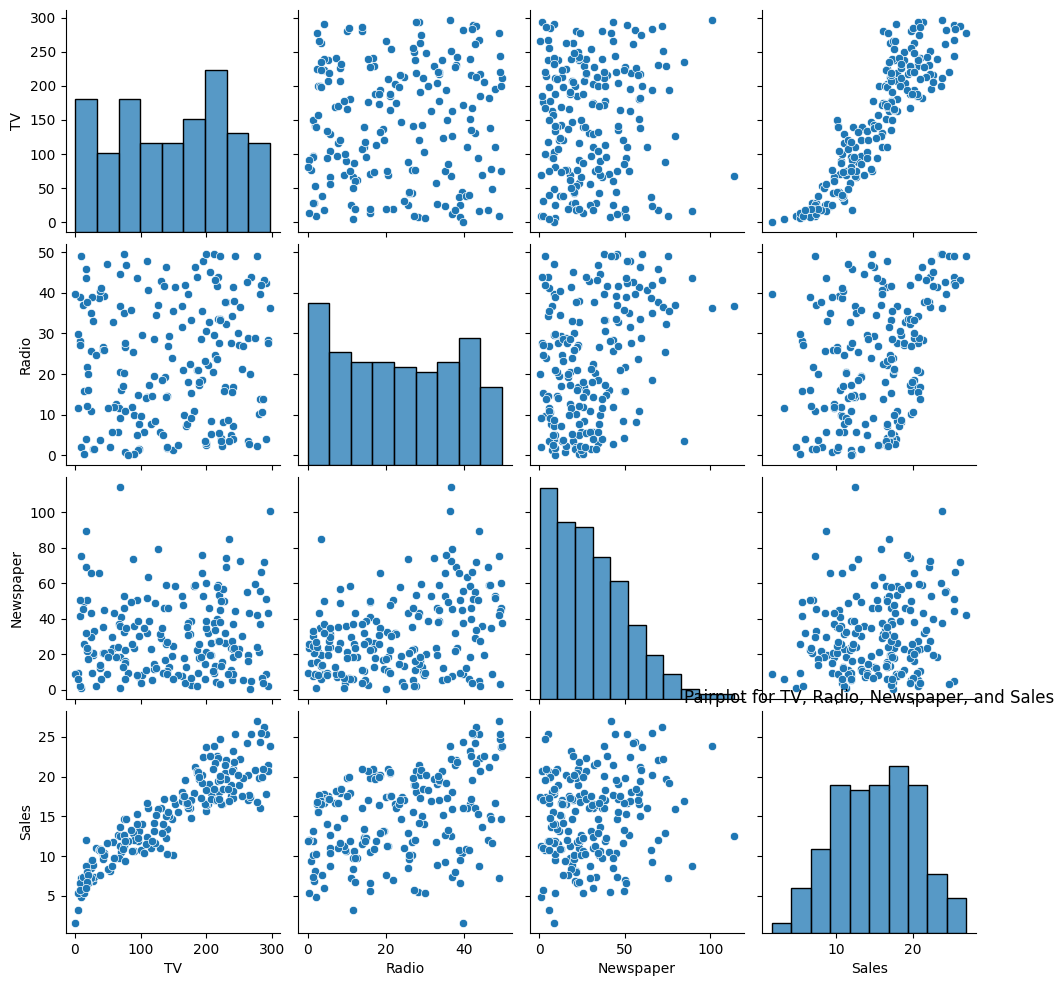

In [ ]:
sns.pairplot(data)
plt.title('Pairplot for TV, Radio, Newspaper, and Sales')
plt.show()

**Correlation Heatmap**

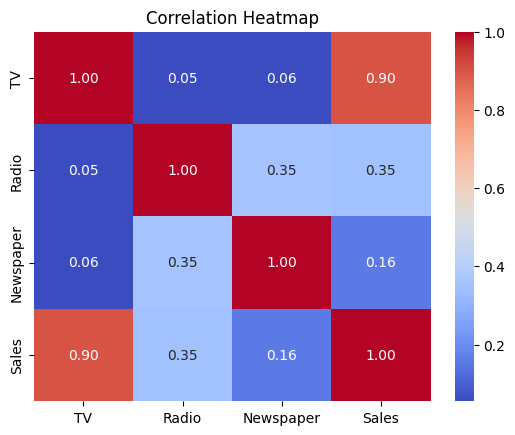

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Sales vs TV**

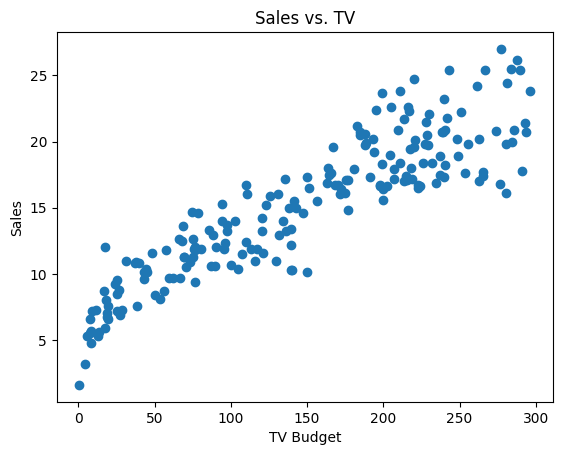

In [ ]:
plt.scatter(data['TV'], data['Sales'])
plt.title('Sales vs. TV')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.show()

**Sales vs Radio**

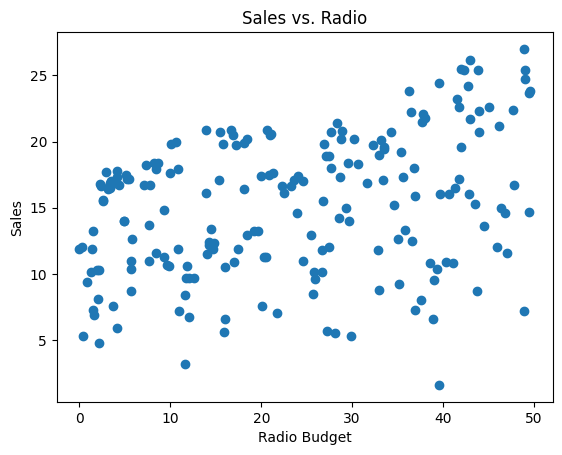

In [ ]:
plt.scatter(data['Radio'], data['Sales'])
plt.title('Sales vs. Radio')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.show()

**Sales vs Newspaper**

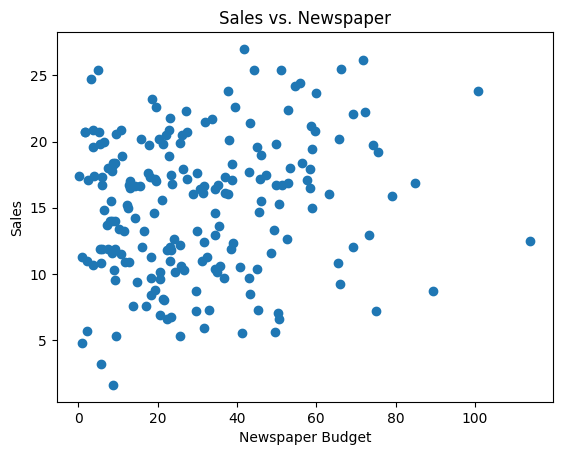

In [ ]:
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Sales vs. Newspaper')
plt.xlabel('Newspaper Budget')
plt.ylabel('Sales')
plt.show()

**TV Budget Distribution**

Text(0.5, 1.0, 'TV Budget Distribution')

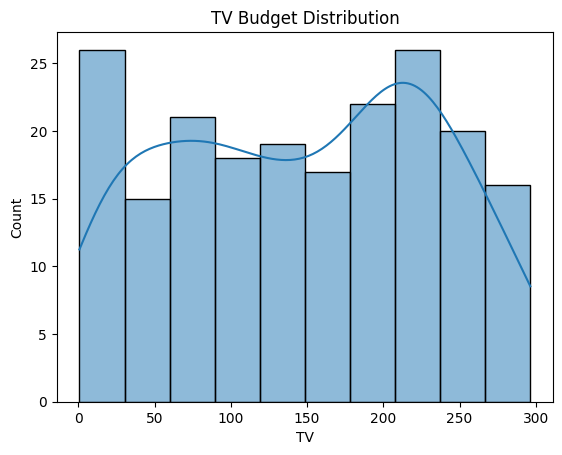

In [ ]:
sns.histplot(data['TV'], bins=10, kde=True)
plt.title('TV Budget Distribution')

**Radio Budget Distribution**

Text(0.5, 1.0, 'Radio Budget Distribution')

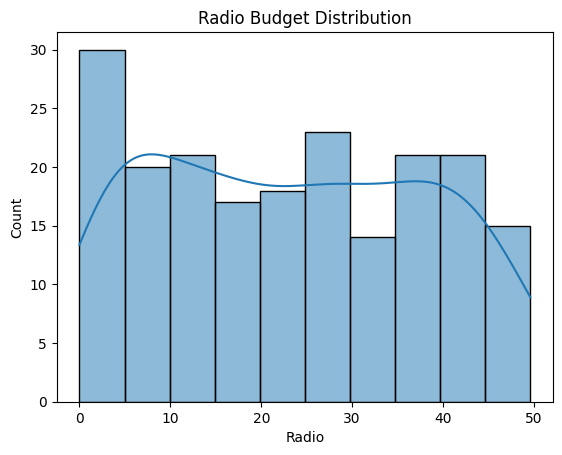

In [ ]:
sns.histplot(data['Radio'], bins=10, kde=True)
plt.title('Radio Budget Distribution')

**Newspaper Budget Distribution**

Text(0.5, 1.0, 'Newspaper Budget Distribution')

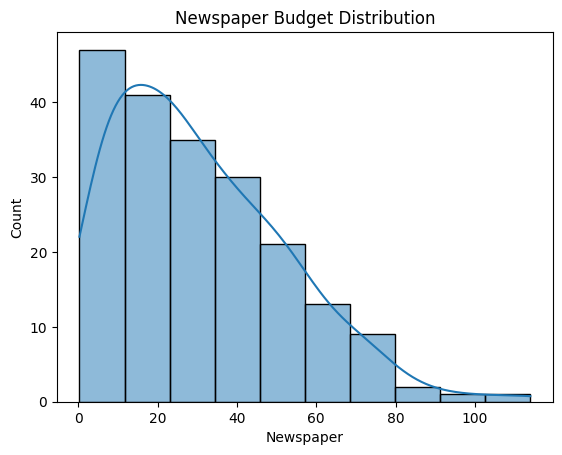

In [ ]:
sns.histplot(data['Newspaper'], bins=10, kde=True)
plt.title('Newspaper Budget Distribution')

**Sales Distribution**

Text(0.5, 1.0, 'Sales Distribution')

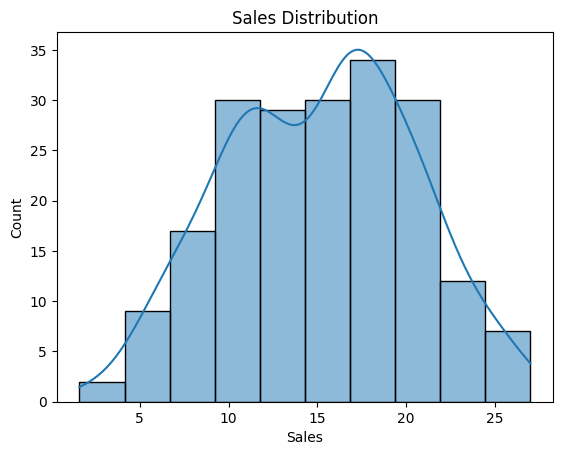

In [ ]:
sns.histplot(data['Sales'], bins=10, kde=True)
plt.title('Sales Distribution')

**Boxplot for Sales**

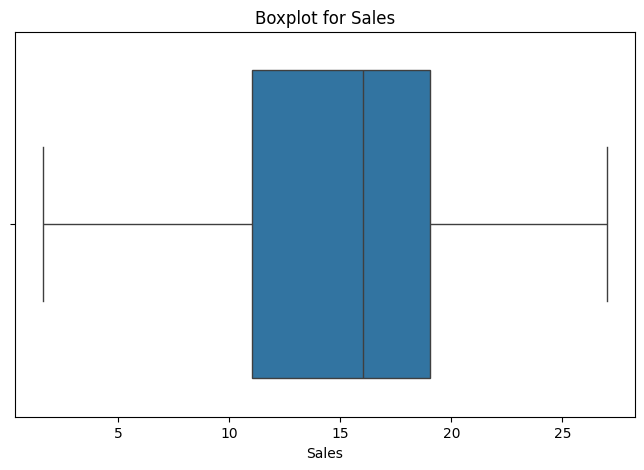

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Sales'])
plt.title('Boxplot for Sales')
plt.xlabel('Sales')
plt.show()

**Data Preprocessing**

In [ ]:
scaler = StandardScaler()

numeric = ["TV","Radio","Newspaper"]

transformer = ColumnTransformer([("num",scaler, numeric)])
x = data.drop("Sales" ,axis = 1)
y = data["Sales"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (200, 3)
y shape : (200,)


In [ ]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.5 ,random_state = 42)

In [ ]:
x_train.shape

(100, 3)

In [ ]:
x_test.shape

(100, 3)

In [ ]:
y_train.shape

(100,)

In [ ]:
y_test.shape

(100,)

**Model Selection and Evaluation**

In [ ]:
# Assuming y_train and y_test are continuous values
mnb = GradientBoostingRegressor()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)
train_predict = mnb.predict(x_train)

# Evaluate the model
train_rmse = mean_squared_error(y_train, mnb.predict(x_train), squared=False)
test_rmse = mean_squared_error(y_test, mnb.predict(x_test), squared=False)

# Print model RMSE
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Training RMSE: 0.27
Test RMSE: 1.51


In [ ]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train R-squared: 0.9973695873668863
Test R-squared: 0.9202243799577619


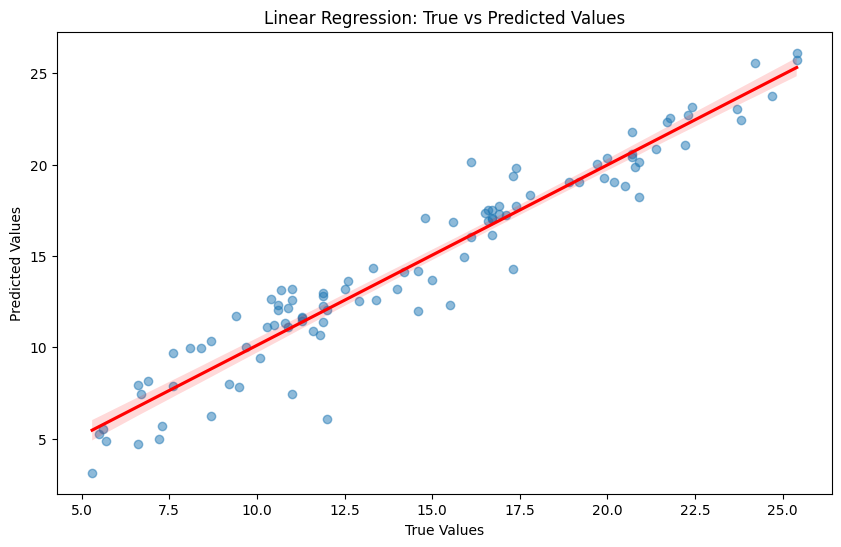

In [ ]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

**LinearRegression**

In [ ]:
# Create and fit the model
ls = LinearRegression()
ls.fit(x_train, y_train)

y_pred = ls.predict(x_test)
train_predict = ls.predict(x_train)

# Print model scores
print("Model Score on Training data:", ls.score(x_train, y_train))
print("Model Score on Testing data:", ls.score(x_test, y_test))

# Make predictions and display regression metrics
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)

Model Score on Training data: 0.8911171517862451
Model Score on Testing data: 0.907313434112335
Mean Squared Error: 2.579099719106539


In [ ]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train R-squared: 0.8911171517862451
Test R-squared: 0.907313434112335


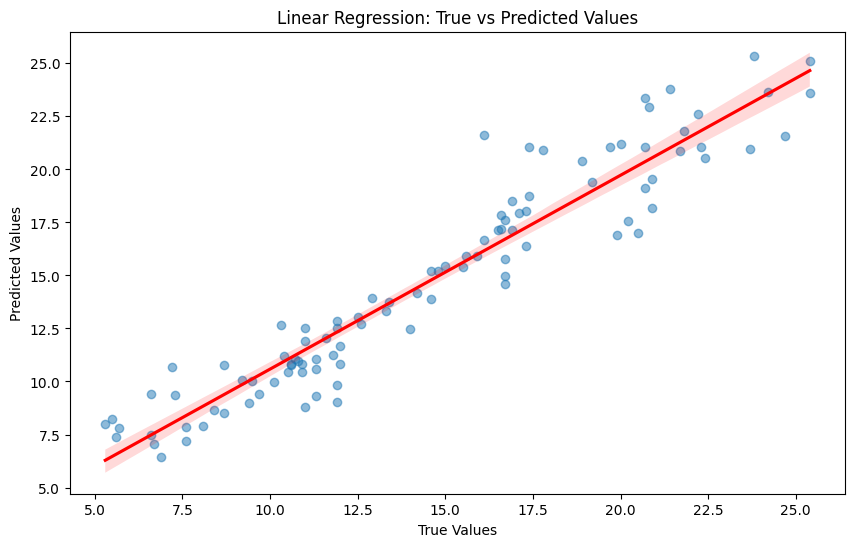

In [ ]:
# Linear Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

**DecisionTreeRegressor**

In [ ]:
# Create the model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
train_predict = model.predict(x_train)

# Print model scores
print("Model Score on Training data:", model.score(x_train, y_train))
print("Model Score on Testing data:", model.score(x_test, y_test))

# Make predictions and display regression metrics
y_pred = model.predict(x_test)
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)

Model Score on Training data: 1.0
Model Score on Testing data: 0.8495365994638978
Mean Squared Error: 4.186799999999998


In [ ]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train R-squared: 1.0
Test R-squared: 0.8495365994638978


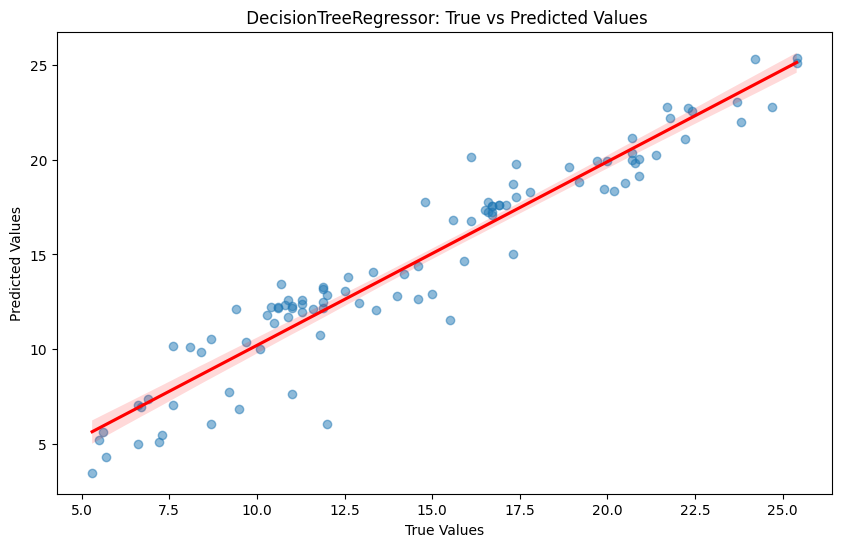

In [ ]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title(' DecisionTreeRegressor: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

**RandomForestRegressor**

In [ ]:
# Create the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
train_predict = model.predict(x_train)

# Print model scores
print("Model Score on Training data:", model.score(x_train, y_train))
print("Model Score on Testing data:", model.score(x_test, y_test))

# Make predictions and display regression metrics
y_pred = model.predict(x_test)
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)

Model Score on Training data: 0.9914806362195707
Model Score on Testing data: 0.9116643276102998
Mean Squared Error: 2.458031600000004


In [ ]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train R-squared: 0.9914806362195707
Test R-squared: 0.9116643276102998


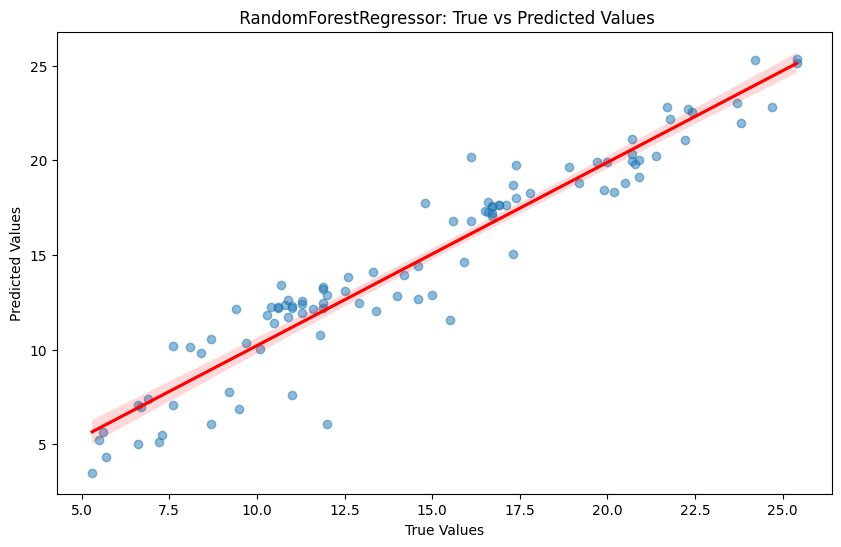

In [ ]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title(' RandomForestRegressor: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

**Conclusion**

* The Gradient Boosting Regressor achieved a high R-squared on the training set but a slightly lower performance on the test set, indicating a potential risk of overfitting.

* Linear Regression performed well with a good balance between training and testing scores and a reasonable mean squared error.

* The Decision Tree Regressor achieved a perfect score on the training set but a lower R-squared on the test set, suggesting overfitting.

* The Random Forest Regressor provided a strong performance, with high R-squared values on both training and testing sets and a low mean squared error.











**Deployment**

In [ ]:
#Random data for testing
new_data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2]
}

In [ ]:
# Preprocess the input data
new_data_df = pd.DataFrame(new_data)
new_data_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [ ]:
new_data_transformed = transformer.transform(new_data_df)

In [ ]:
# Make predictions  from inear Regression
predicted_labels = ls.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [21.57804685 11.40249917 10.80918948 17.5529331  16.07204179 10.70250628
 11.25206238 13.22200859  5.28506179 15.93037797]


In [ ]:
# Make predictions  from GradientBoostingRegressor model
predicted_labels = mnb.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [22.10270899 10.48808777  6.08185815 16.65539482 17.71246084  4.97075238
 10.67644454 13.14723724  4.830517   16.86458684]


In [ ]:
# Make predictions  from RandomForestRegressor model
predicted_labels = model.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [21.764 10.322  6.067 16.384 17.747  5.118 10.744 13.063  4.515 16.811]
